<a href="https://colab.research.google.com/github/PatriciaLucas/CNN/blob/master/Previsao_ETo_CNN_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reference evapotranspiration prediction with individual CNN models and CNN ensemble

  


In [1]:
!pip install keras-tcn==2.8.3
!git clone https://github.com/PatriciaLucas/CNN
from CNN import Ensemble as es
from CNN import basic
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
import warnings
from google.colab import files
warnings.filterwarnings("ignore")

Cloning into 'CNN'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 65 (delta 33), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (65/65), done.


Using TensorFlow backend.


##Database

In [0]:
def get_search_dataset():
    df1 = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/Evapotranspiracao/master/ETo_setelagoas.csv', sep=',')
    series = df1.iloc[:,1]
    train = series[:6939]
    test = series[8035:] #ano de teste: 2015
    return train, test

## Individual models

In [0]:
star_CNN1 = {'filters': 1, 'pool': 0, 'pool_size': 3, 'dropout': 0.012594059561340142, 'norm': 1, 'lags': 4, 'num_conv': 1, 'kernel_size': 3, 'rmse': 0.7696852129001718, 'num_param': 449}
star_CNN2 = {'filters': 1, 'dropout': 0, 'norm': 1, 'lags': 4, 'num_conv': 1, 'kernel_size': 0, 'rmse': 0.7566198577347709, 'num_param': 449}
star_CNN3 = {'pilhas': 2, 'filters': 1, 'dropout': 0.2, 'norm': 1, 'lags': 48, 'num_conv': 3, 'kernel_size': 2, 'rmse': 0.7530, 'num_param': 68257} 

In [0]:
train, test = get_search_dataset()

In [0]:
def form_data(data, t):  
  df = pd.DataFrame(data)
  df1 = df.T
  frames = [df1.iloc[:,0], df1.iloc[:,1], df1.iloc[:,2], df1.iloc[:,3], df1.iloc[:,4], df1.iloc[:,5], df1.iloc[:,6], df1.iloc[:,7], df1.iloc[:,8], df1.iloc[:,9], df1.iloc[:,10], df1.iloc[:,11],
         df1.iloc[:,12], df1.iloc[:,13], df1.iloc[:,14], df1.iloc[:,15], df1.iloc[:,16], df1.iloc[:,17],df1.iloc[:,18], df1.iloc[:,19], df1.iloc[:,20], df1.iloc[:,21], df1.iloc[:,22], df1.iloc[:,23],
         df1.iloc[:,24], df1.iloc[:,25], df1.iloc[:,26], df1.iloc[:,27], df1.iloc[:,28], df1.iloc[:,29]]
  result = pd.concat(frames)
  r = pd.DataFrame(result) 
  r.insert(1, "Model", True) 
  for i in range(300):
      r['Model'].iloc[i] = 'CNN'+ t
  return r

###CNN1

In [0]:
results_CNN1 = []
train, test, scaler = es.get_dados(star_CNN1, train, test)
X_train, y_train, X_test, y_test = basic.slideWindow(train, test, star_CNN1['lags'])
for i in range(30):
  model,_ = basic.modelo_CNN1(X_train, y_train, star_CNN1) 
  rmse, yhat, y_test = basic.predictModel(test, model, 10,  star_CNN1['lags'], scaler)
  results_CNN1.append(rmse)
  print(i)

results_CNN1 = form_data(results_CNN1, '1')
results_CNN1.to_csv('results_CNN1',index=True)

###CNN2

In [0]:
results_CNN2 = []
train, test, scaler = es.get_dados(star_CNN2, train, test)
X_train, y_train, X_test, y_test = basic.slideWindow(train, test, star_CNN2['lags'])
for i in range(30):
  model,_ = basic.modelo_CNN2(X_train, y_train, star_CNN2) 
  rmse, yhat, y_test = basic.predictModel(test, model, 10,  star_CNN2['lags'], scaler)
  results_CNN2.append(rmse)

results_CNN2 = form_data(results_CNN2, '2')
results_CNN2.to_csv('results_CNN2',index=True)

###CNN3

In [0]:
results_CNN3 = []
train, test, scaler = es.get_dados(star_CNN3, train, test)
X_train, y_train, X_test, y_test = basic.slideWindow(train, test, star_CNN3['lags'])
for i in range(30):
  model3,_ = basic.modelo_CNN3(X_train, y_train, star_CNN3) 
  rmse, yhat, y_test = basic.predictModel(test, model3, 10, star_CNN3['lags'], scaler)
  results_CNN3.append(rmse)

results_CNN3 = form_data(results_CNN3, '3')
results_CNN3.to_csv('results_CNN3',index=True)

## Ensemble models


### CNN1

In [0]:
results_ECNN1 = []
for i in range(1):
  rmse, yhat, kde_list = es.executa(train, test, 0, 6)
  results_ECNN1.append(rmse)
results_ECNN1 = form_data(results_ECNN1, 'E1')
results_ECNN1.to_csv('results_ECNN1',index=True)

###CNN2

In [0]:
results_ECNN2 = []
for i in range(30):
  rmse, yhat, kde_list = es.executa(train, test, 1, 6)
  results_ECNN2.append(rmse)
  
#results_ECNN2 = form_data(results_ECNN2, 'E2')
#results_ECNN2.to_csv('results_ECNN2',index=True)

###CNN3

In [0]:
results_ECNN3 = []
for i in range(30):
  rmse, yhat, kde_list = es.executa(train, test, 2, 6)
  results_ECNN3.append(rmse)
results_ECNN3 = form_data(results_ECNN3, 'E3')
results_ECNN3.to_csv('results_ECNN3',index=True)

###CNNH

In [0]:
results_ECNNH = []
for i in range(30):
  rmse, yhat, kde_list = es.executa(train, test, 3, 6)
  results_ECNNH.append(rmse)
results_ECNNH = form_data(results_ECNNH, 'EH')
results_ECNNH.to_csv('results_ECNNH',index=True)

## Comparison of individual models and ensembles

Text(0, 0.5, 'RMSE')

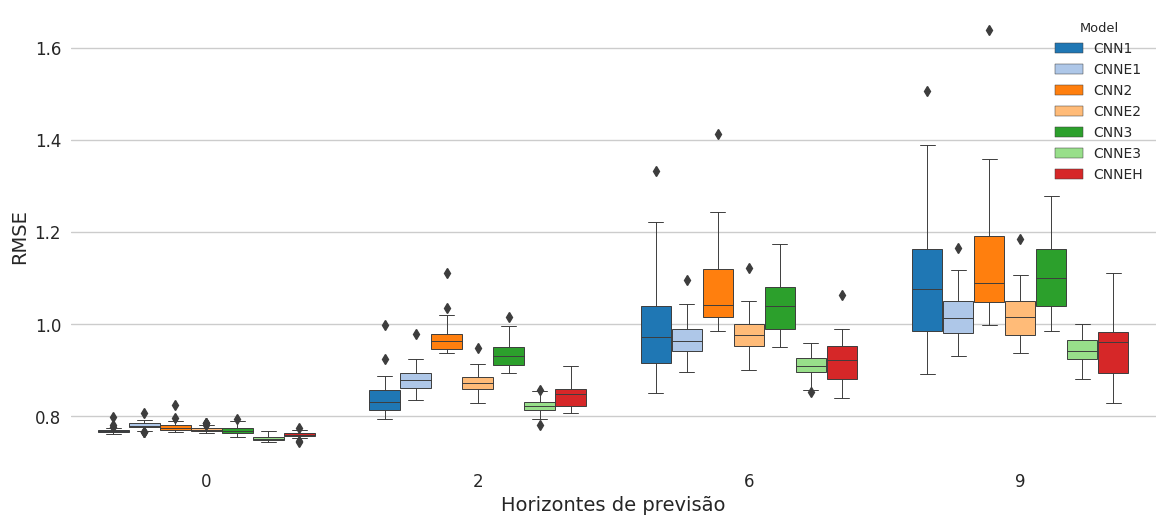

In [12]:
CNN1 = pd.read_csv('results_CNN1',delimiter=',')
CNN1 = CNN1[CNN1['Unnamed: 0'].isin(['0','2','6','9'])]
CNN2 = pd.read_csv('results_CNN2',delimiter=',')
CNN2 = CNN2[CNN2['Unnamed: 0'].isin(['0','2','6','9'])]
CNN3 = pd.read_csv('results_CNN3',delimiter=',')
CNN3 = CNN3[CNN3['Unnamed: 0'].isin(['0','2','6','9'])]

ECNN1 = pd.read_csv('results_CNNE1',delimiter=',')
ECNN1 = ECNN1[ECNN1['Unnamed: 0'].isin(['0','2','6','9'])]
ECNN2 = pd.read_csv('results_CNNE2',delimiter=',')
ECNN2 = ECNN2[ECNN2['Unnamed: 0'].isin(['0','2','6','9'])]
ECNN3 = pd.read_csv('results_CNNE3',delimiter=',')
ECNN3 = ECNN3[ECNN3['Unnamed: 0'].isin(['0','2','6','9'])]
EHIBRIDO = pd.read_csv('results_CNNEH',delimiter=',')
EHIBRIDO = EHIBRIDO[EHIBRIDO['Unnamed: 0'].isin(['0','2','6','9'])]
frames = [CNN1, ECNN1, CNN2, ECNN2, CNN3, ECNN3, EHIBRIDO]
result = pd.concat(frames, ignore_index=True)

plt.style.use('seaborn')
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[14,6], dpi=100)
g1 = sns.boxplot(x=result.iloc[:,0], y=result.iloc[:,1], hue=result.iloc[:,2], data=result, palette="tab20", linewidth=0.7, saturation=1)
plt.tick_params(labelsize=12)
plt.xlabel("Horizontes de previsão", fontsize=14)
plt.ylabel("RMSE", fontsize=14)